In [86]:
from matplotlib import pyplot as plt
from math import pi, cos, e
from cmath import phase
from numpy import linspace, polyfit, array
from scipy import interpolate
from scipy.signal import savgol_filter

# plotting X1(t)

In [87]:
def func_x1(t):
    cos_arg = pi * t / 5e-6
    return (0.6 +
        2 * 0.16 * cos(2 * cos_arg - 1.88) +
        2 * 0.26 * cos(4 * cos_arg - 0.627) +
        2 * 0.06 * cos(6 * cos_arg - 2.5) +
        2 * 0.037 * cos(8 * cos_arg + 1.84) +
        0.2 * cos(10 * cos_arg)
    )

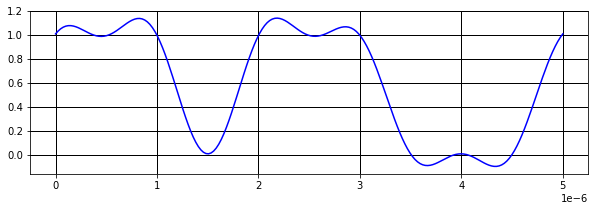

In [88]:
x = linspace(0, 5e-6, num=200)
y = [func_x1(t) for t in x]

plt.figure(figsize=(10, 3))
plt.plot(x, y, "b-")
plt.grid(color='black', linestyle='-', linewidth=1)
plt.savefig('output/x1.png', dpi = 1000)
plt.show()

# Plotting X2(t)

In [89]:
def func_x2(t):
    cos_arg = pi * t / 10e-6
    return (0.3 +
        2 * 0.228 * cos(2 * cos_arg - 0.9) +
        2 * 0.076 * cos(4 * cos_arg - 1.9) +
        2 * 0.06 * cos(6 * cos_arg + 0.32) +
        2 * 0.13 * cos(8 * cos_arg - 0.63) +
        2 * 0.1 * cos(10 * cos_arg - 1.57) +
        2 * 0.03 * cos(12 * cos_arg - 2.5) +
        2 * 0.005 * cos(14 * cos_arg - 0.3) +
        2 * 0.018 * cos(16 * cos_arg + 1.88) +
        2 * 0.07 * cos(18 * cos_arg + 0.95) +
        0.1 * cos(20 * cos_arg)
    )

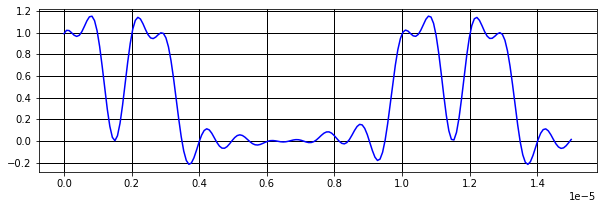

In [90]:
x = linspace(0, 15e-6, num=200)
y = [func_x2(t) for t in x]

plt.figure(figsize=(10, 3))
plt.plot(x, y, "b-")
plt.grid(color='black', linestyle='-', linewidth=1)
plt.savefig('output/x2.png', dpi = 1000)
plt.show()

# Calculation of coefficients

In [91]:
with open("output/output_data.txt", "w") as file:
    tab_slash = '\t'
    print(f"i{tab_slash * 4}x{tab_slash * 5}abs(x){tab_slash * 3}Arg(x)")
    print('-' * 120)
    for iterarion in range(1, 10):
        e_arg = -1j * 2 * pi * iterarion
        x = (1 / 20) * (
            e ** (e_arg * 0 / 20) +
            e ** (e_arg * 1 / 20) +
            e ** (e_arg * 2 / 20) +
            e ** (e_arg * 3 / 20) +
            e ** (e_arg * 4 / 20) +
            e ** (e_arg * 8 / 20) +
            e ** (e_arg * 9 / 20) +
            e ** (e_arg * 10 / 20) +
            e ** (e_arg * 11 / 20) +
            e ** (e_arg * 12 / 20)
            )
        x_abs = abs(x)
        x_phase = phase(x)
        print(f"{iterarion}\t{x}       \t{x_abs}\t{x_phase}")

i				x					abs(x)			Arg(x)
------------------------------------------------------------------------------------------------------------------------
1	(-0.04316356320013402-0.13284378786687612j)       	0.1396802246667421	-1.8849555921538759
2	(0.2118033988749895-0.15388417685876263j)       	0.2618033988749895	-0.6283185307179585
3	(-0.10194208842938134-0.0740652626376288j)       	0.1260073510670101	-2.5132741228718345
4	(8.326672684688674e-17+2.7755575615628914e-17j)       	8.777083671441753e-17	0.3217505543966422
5	(0.10000000000000009+3.6739403974420595e-17j)       	0.10000000000000009	3.6739403974420564e-16
6	(-0.011803398874989475-0.036327126400268084j)       	0.03819660112501055	-1.8849555921538754
7	(0.051942088429381354-0.0377381362373608j)       	0.06420395219202069	-0.6283185307179595
8	(9.159339953157542e-17-1.5543122344752193e-16j)       	1.8041124150158796e-16	-1.0382922284930458
9	(-0.006836436799865925+0.021040388991886563j)       	0.022123174208247384	1.884955592153874


# Plotting X3(t)

In [92]:
def func_x3(t):
    cos_arg = t * pi  / (5 * 10 ** (-6))
    return (0.5 +
        2 * 0.13 * cos(2 * cos_arg - 1.88) +
        2 * 0.26 * cos(4 * cos_arg - 0.62) +
        2 * 0.12 * cos(6 * cos_arg - 2.5) +
        2 * 8.77e-17 * cos(8 * cos_arg + 0.33) +
        2 * 0.1 * cos(10 * cos_arg + 3.67e-16) +
        2 * 0.03 * cos(12 * cos_arg - 1.88) +
        2 * 0.06 * cos(14 * cos_arg - 0.62) +
        2 * 1.804e-16 * cos(16 * cos_arg - 1.03) +
        2 * 0.02 * cos(18 * cos_arg + 1.88) +
        0.1 * cos(20 * cos_arg)
    )

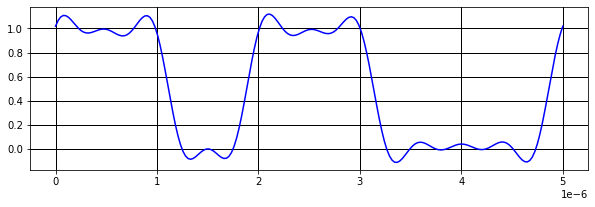

In [93]:
x = linspace(0, 5e-6, num=200)
y = [func_x3(t) for t in x]

plt.figure(figsize=(10, 3))
plt.plot(x, y, "b-")
plt.grid(color='black', linestyle='-', linewidth=1)
plt.savefig('output/x3.png', dpi = 1000)
plt.show()

# Original spectrum 

In [94]:
def func_spec_1(w):
    return abs(-(1j * (1 - e ** (-1j * (-6 + e) * w))) / w -
            (1j * e ** (-3 * 1j * (-2 + e) * w) * (-1 + e ** (1j * e * w))) / w)

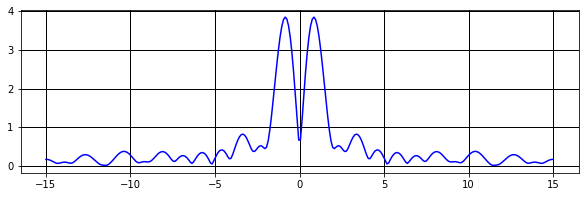

In [95]:
x = linspace(-15, 15, num=300)
y = array([func_spec_1(t) for t in x])
plt.figure(figsize=(10, 3))
plt.plot(x, y, "b-")
plt.grid(color='black', linestyle='-', linewidth=1)
plt.savefig('output/spectrum.png', dpi = 1000)
plt.show()

# C(X1)-ratio graph

In [110]:
frequency = [(2 * i * pi) / 5e-6 for i in range(0, 6)]
amplitude = [0, 0.16, 0.26, 0.06, 0.037, 0.2]
amplitude = list(map(lambda x: x + 0.6, amplitude))

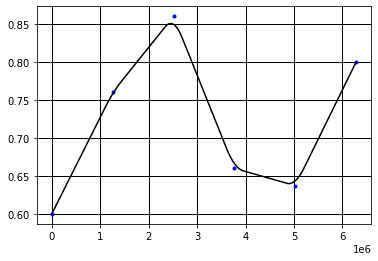

In [111]:
itp = interpolate.interp1d(frequency, amplitude, kind='linear')
window_size = 57
poly_order = 1

itp_amplitude = linspace(min(frequency), max(frequency), 1000)
itp_frequency = savgol_filter(itp(itp_amplitude), window_size, poly_order)

plt.plot(frequency, amplitude, 'b.')
plt.plot(itp_amplitude, itp_frequency, 'k')
plt.grid(color='black', linestyle='-', linewidth=1)
plt.savefig('output/c_1_ratio.png', dpi = 1000)
plt.show()

# C(X2)-ratio graph

In [96]:
frequency = [(2 * i * pi) / 10e-6 for i in range(0, 11)]
amplitude = [0, 0.228, 0.08, 0.063, 0.13, 0.1, 0.03, 0.005, 0.018, 0.07, 0.1]
amplitude = list(map(lambda x: x + 0.3, amplitude))

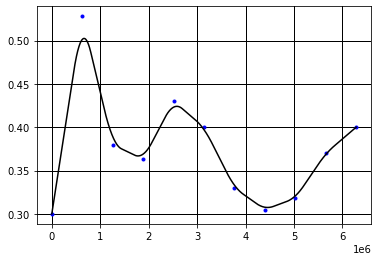

In [100]:
itp = interpolate.interp1d(frequency, amplitude, kind='linear')
window_size = 57
poly_order = 1

itp_amplitude = linspace(min(frequency), max(frequency), 1000)
itp_frequency = savgol_filter(itp(itp_amplitude), window_size, poly_order)

plt.plot(frequency, amplitude, 'b.')
plt.plot(itp_amplitude, itp_frequency, 'k')
plt.grid(color='black', linestyle='-', linewidth=1)
plt.savefig('output/c_2_ratio.png', dpi = 1000)
plt.show()

# C(X3)-ratio graph

In [108]:
frequency = [(2 * i * pi) / 5e-6 for i in range(0, 9)]
amplitude = [0, 0.13, 0.26, 0.126, 0.1, 0.038, 0.064, 0.02, 0.1]
amplitude = list(map(lambda x: x + 0.5, amplitude))

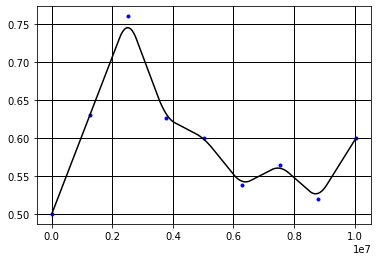

In [109]:
itp = interpolate.interp1d(frequency, amplitude, kind='linear')
window_size = 57
poly_order = 1

itp_amplitude = linspace(min(frequency), max(frequency), 1000)
itp_frequency = savgol_filter(itp(itp_amplitude), window_size, poly_order)

plt.plot(frequency, amplitude, 'b.')
plt.plot(itp_amplitude, itp_frequency, 'k')
plt.grid(color='black', linestyle='-', linewidth=1)
plt.savefig('output/c_2_ratio.png', dpi = 1000)
plt.show()